# EDA on FIFA World Cup Matches

Dataset: https://www.kaggle.com/abecklas/fifa-world-cup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [5]:
world_cups = pd.read_csv('WorldCups.csv')
players = pd.read_csv('WorldCupPlayers.csv')
matches = pd.read_csv('WorldCupMatches.csv')

In [6]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [7]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [8]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [9]:
world_cups.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [10]:
matches.isna().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [11]:
players.isna().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [12]:
print(players.shape)
print(matches.shape)
print(world_cups.shape)

(37784, 9)
(4572, 20)
(20, 10)


In [13]:
matches['Home Team Name'].value_counts()
# we can see that some strings contain 'rn">' which is needed to be removed

Brazil        82
Italy         57
Argentina     54
Germany FR    43
England       35
              ..
Jamaica        1
Ukraine        1
Angola         1
Bolivia        1
Serbia         1
Name: Home Team Name, Length: 78, dtype: int64

In [14]:
matches.dropna(subset = ['Year'], inplace = True)

In [15]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name']

In [16]:
wrong = list(names.values)
# list of wrong names

In [17]:
correct = [name.split('>')[1] for name in wrong]
# correct name for the wrong names

In [18]:
correct

['United Arab Emirates',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [19]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [20]:
wrong = wrong + old
correct = correct + new

In [21]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

# Most Number of World Cup Winning title

In [22]:
winner = world_cups['Winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
France       1
England      1
Spain        1
Name: Winner, dtype: int64

In [23]:
runner_up = world_cups['Runners-Up'].value_counts()
runner_up

Germany           4
Argentina         3
Netherlands       3
Hungary           2
Italy             2
Brazil            2
Czechoslovakia    2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [24]:
third = world_cups['Third'].value_counts()
third

Germany        4
Poland         2
Brazil         2
France         2
Sweden         2
Austria        1
Croatia        1
Netherlands    1
Turkey         1
Chile          1
Portugal       1
Italy          1
USA            1
Name: Third, dtype: int64

In [25]:
teams = pd.concat([winner, runner_up, third], axis = 'columns')
teams.fillna(0, inplace = True)
teams = teams.astype('int')
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
France,1,1,2
England,1,0,0
Spain,1,0,0
Netherlands,0,3,1
Hungary,0,2,0


In [26]:
teams.iplot(kind = 'bar')

# Number of Goal Per Country

#### Total number of goals scored by each country in all world cups till 2012

In [27]:
matches.head(2) 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [28]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [29]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [30]:
goals = home.append(away, ignore_index=True)

In [31]:
goals = goals.groupby('Countries').sum()
goals.sort_values(by = 'Goals', ascending = False, inplace = True)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [32]:
goals[:20].iplot(kind = 'bar', xTitle = 'Country Names', yTitle = 'Goals', title = 'Countries Hits Most Number of Goals')

# Attendance,Number of Teams, Goals and Matches Per Cup

In [33]:
world_cups.head(2)
# As we can see, the attendance is in decimals which is wrong

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [34]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.','')

In [35]:
world_cups['Attendance'].dtypes

dtype('O')

In [36]:
world_cups['Attendance'] = world_cups['Attendance'].astype('int')

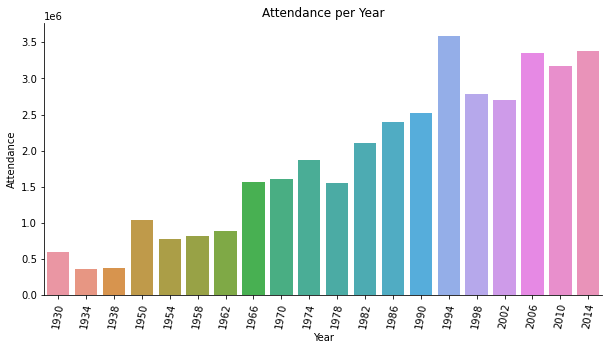

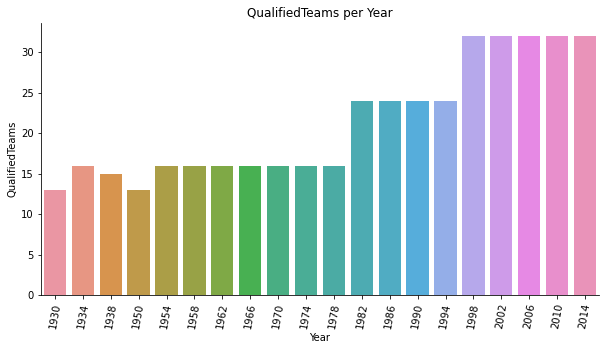

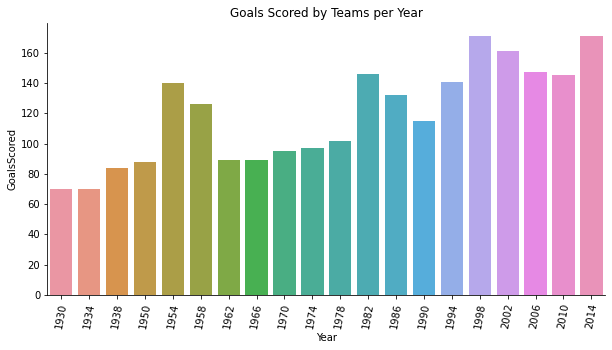

In [37]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True) # It disappears the right boundry of the graph

g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance per Year')

# =======================================

fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('QualifiedTeams per Year')

# =======================================

fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams per Year')

plt.show()

# Matches With Highest Number of Attendance

In [38]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [39]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'] )

In [40]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y'))

In [41]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


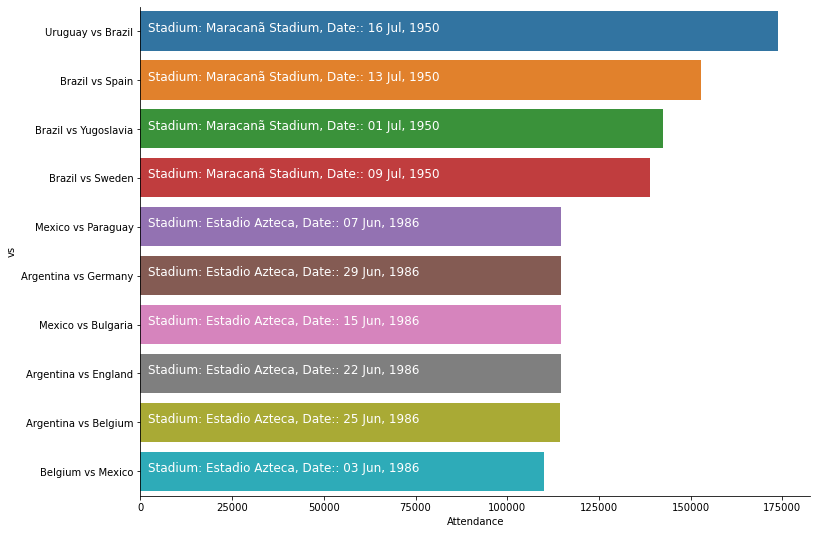

In [49]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + ' vs ' + top10['Away Team Name']

plt.figure(figsize = (12, 9))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)


for i, s in enumerate('Stadium: ' + top10['Stadium'] + ', Date:: '+ top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')

# Stadiums with Highest Average Attendance

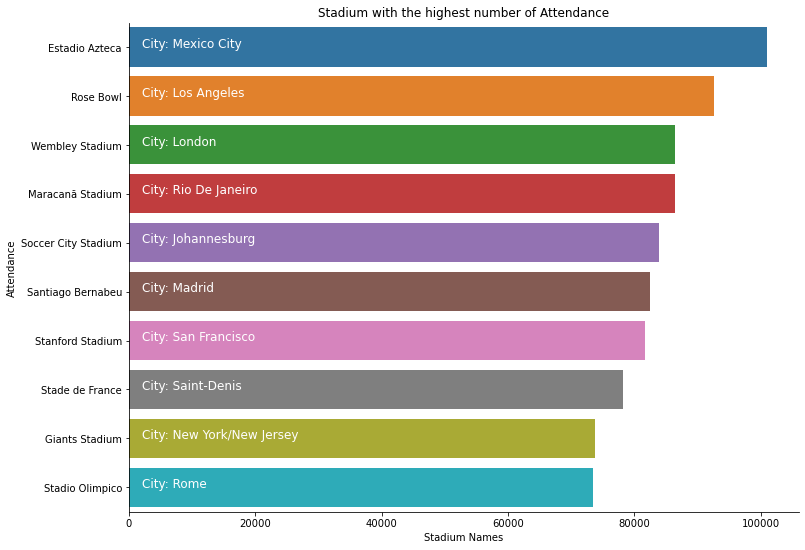

In [53]:
matches['Year'] = matches['Year'].astype('int')

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending = False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)
plt.xlabel('Stadium Names')
plt.ylabel('Attendance')
plt.title('Stadium with the highest number of Attendance')


for i, s in enumerate('City: ' + top10['City']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
    
plt.show()

In [54]:
matches['City'].value_counts()[:20].iplot(kind = 'bar')

# Match Outcomes by home and Away Teams

In [55]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Wins'
    return 'DRAW'    

In [56]:
matches['Outcomes'] = matches.apply(lambda x: get_labels(x), axis = 1)

In [57]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Outcomes
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [58]:
plt.figure(figsize = (6, 6))

mt = matches['Outcomes'].value_counts()
mt

Home Team Win     488
DRAW              190
Away Team Wins    174
Name: Outcomes, dtype: int64

<Figure size 432x432 with 0 Axes>

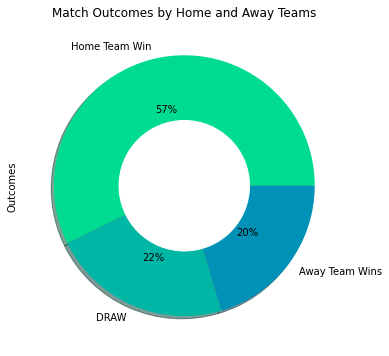

In [67]:
plt.figure(figsize = (6, 6))
mt.plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('winter_r'), shadow = True)


c = plt.Circle((0, 0), 0.5, color = 'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()